<a href="https://colab.research.google.com/github/PhillipOBonsu/clustering_assignment/blob/main/A5_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/ds3001f25/clustering_assignment.git

In [41]:
#Question 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

def createData(noise, N=50):
   # makingthe seed replicable
    np.random.seed(100)
    # Generating triples
    X1 = np.array([np.random.normal(1,noise,N), np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N), np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N), np.random.normal(3,noise,N)])
    gdf1 = pd.DataFrame({'x1':X1[0, :],'x2':X1[1,:], 'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0, :],'x2':X2[1,:], 'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0, :],'x2':X3[1,:], 'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3], axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

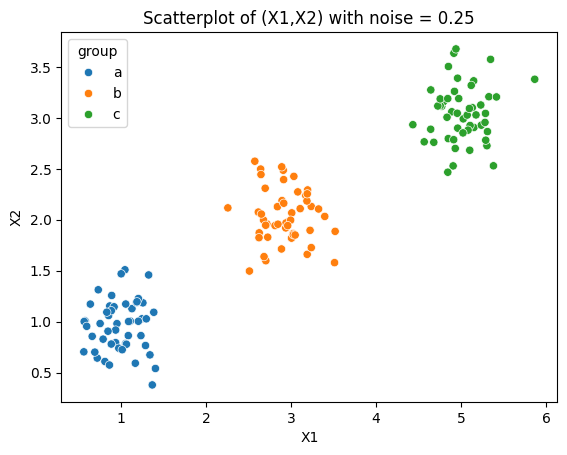

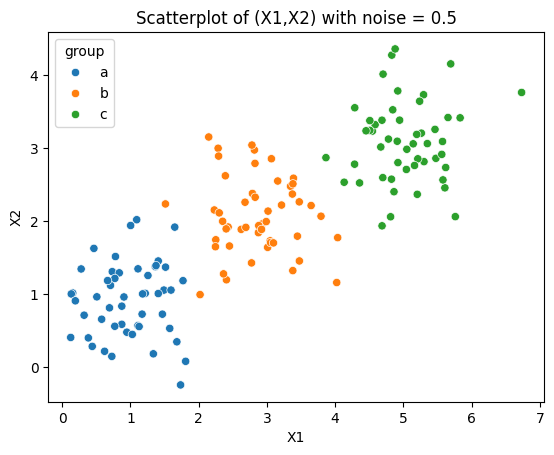

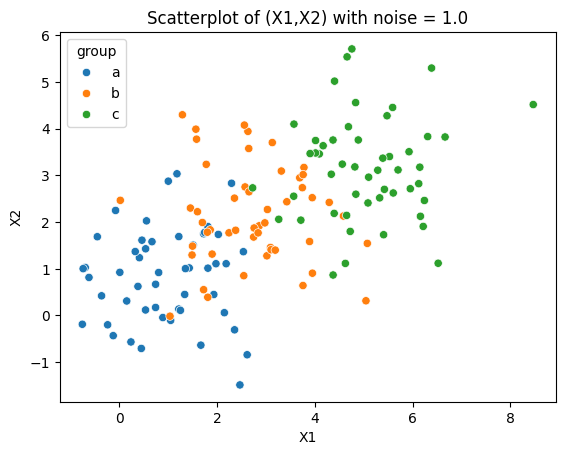

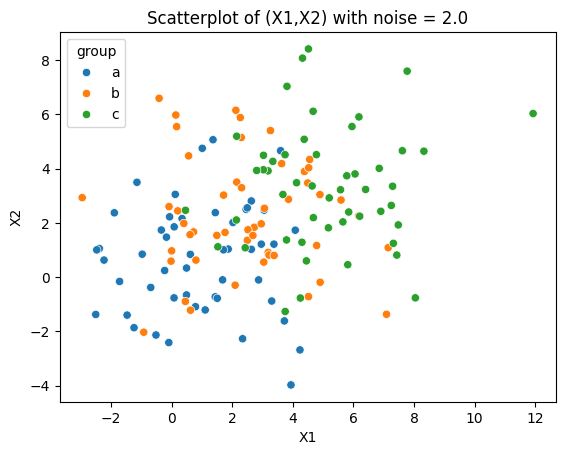

In [42]:
# Scatterplots for each dataset by the noise level
sns.scatterplot(data=df0_25, x="x1", y="x2", hue="group")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatterplot of (X1,X2) with noise = 0.25")
plt.show()

sns.scatterplot(data=df0_5, x="x1", y="x2", hue="group")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatterplot of (X1,X2) with noise = 0.5")
plt.show()

sns.scatterplot(data=df1_0, x="x1", y="x2", hue="group")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatterplot of (X1,X2) with noise = 1.0")
plt.show()

sns.scatterplot(data=df2_0, x="x1", y="x2", hue="group")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Scatterplot of (X1,X2) with noise = 2.0")
plt.show()

As the noise is increasing the plots on the graph decluster and start dispersing.

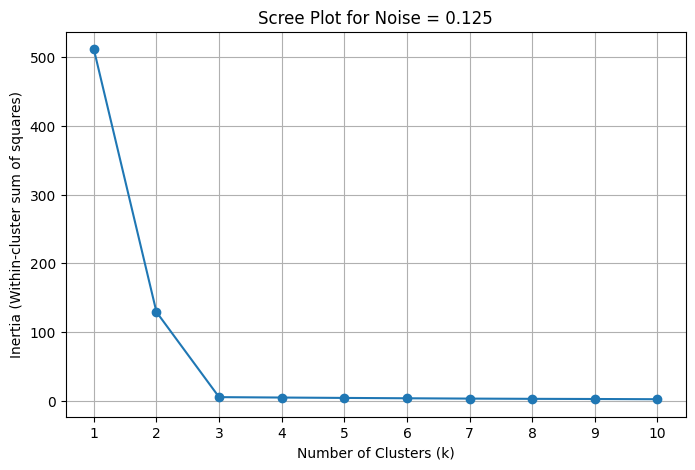

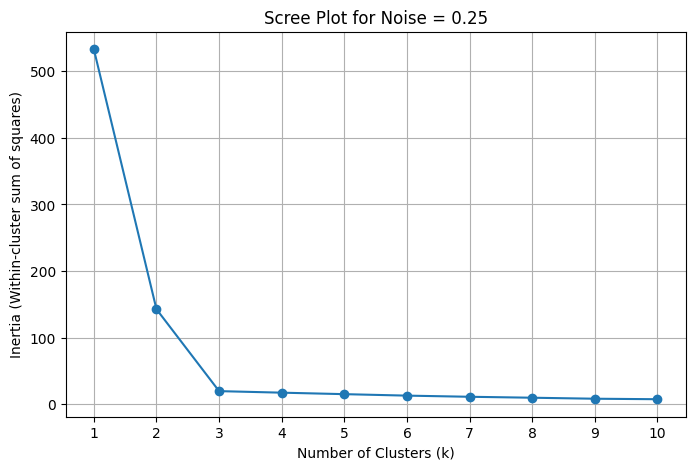

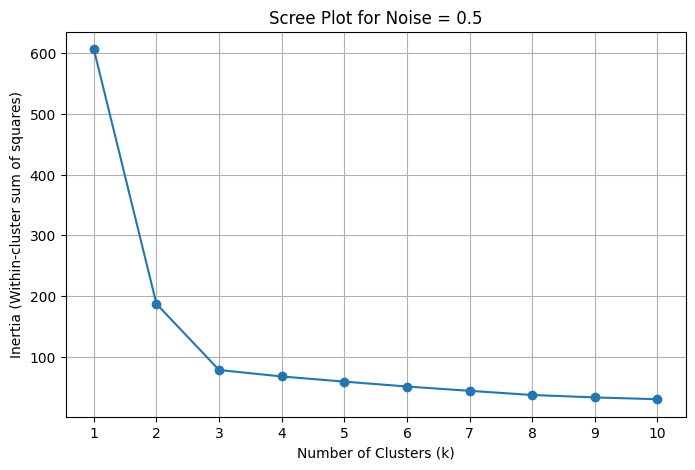

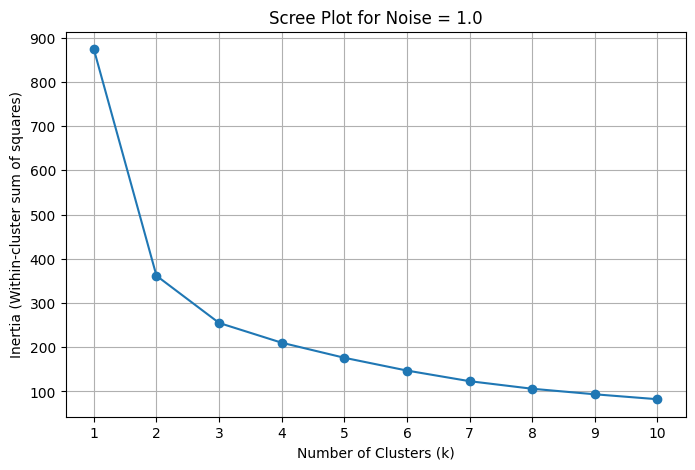

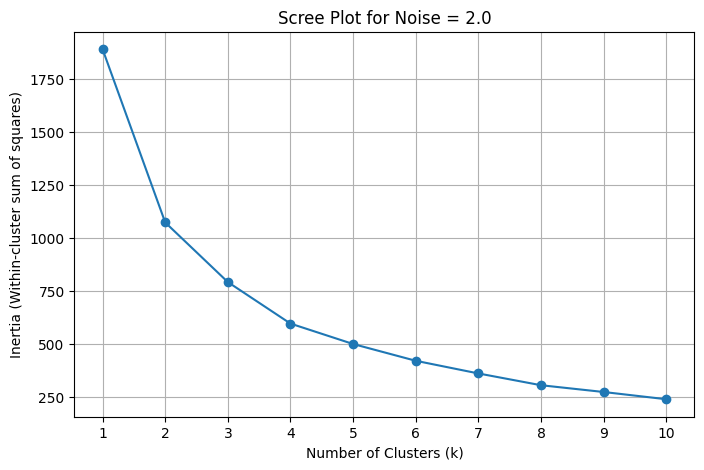

In [43]:
# Scree plot creation based on data
from sklearn.cluster import KMeans

def create_scree_plot(df, title):
    X = df[['x1', 'x2']]
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster sum of squares)')
    plt.title(f'Scree Plot for {title}')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

create_scree_plot(df0_125, 'Noise = 0.125')
create_scree_plot(df0_25, 'Noise = 0.25')
create_scree_plot(df0_5, 'Noise = 0.5')
create_scree_plot(df1_0, 'Noise = 1.0')
create_scree_plot(df2_0, 'Noise = 2.0')

In the graphs with low noise, the elbow is clear at k = 3. As noise increases, the elbow becomes harder to spot even though k = 3 is still suggested. When the noise is highest, the elbow almost disappears and the best k value becomes uncertain.

The elbow method works because adding more clusters always reduces inertia (the within-cluster sum of squares), but the rate of improvement slows down. With low noise, the clusters are well separated, so inertia drops sharply until k = 3, creating a distinct elbow. As noise grows, clusters overlap, the reduction in inertia is more gradual, and the elbow becomes less pronounced.

In [44]:
# Question 2
# Loading 2022 election cycle fundraising.csv file
df = pd.read_csv('./clustering_assignment/data/2022 election cycle fundraising.csv')

In [45]:
def clean_currency(s):
    if isinstance(s, str):
        return float(s.replace('$', '').replace(',', ''))
    return float(s)

for col in ["Raised", "Spent", "Cash on Hand", "Debts"]:
    df[col] = df[col].apply(clean_currency)

display(df.head())
display(df.info())

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,7719396.0,7449678.0,851851.0,0.0
1,1,Adam Kinzinger,Republican,Illinois,House,2192741.0,1243502.0,2472888.0,0.0
2,2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0
3,3,Adam Smith,Democratic,Washington,House,1211111.0,1173466.0,623472.0,0.0
4,4,Adrian Smith,Republican,Nebraska,House,1617611.0,1664674.0,1098579.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         537 non-null    int64  
 1   Member        537 non-null    object 
 2   Party         537 non-null    object 
 3   State         537 non-null    object 
 4   Chamber       537 non-null    object 
 5   Raised        537 non-null    float64
 6   Spent         537 non-null    float64
 7   Cash on Hand  537 non-null    float64
 8   Debts         537 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 37.9+ KB


None

initially the data had commas and dollar symbols. I cleaned this data by removing the dollar symbols and commas from the data set which made it a numeric value in all the variables instead of a string.

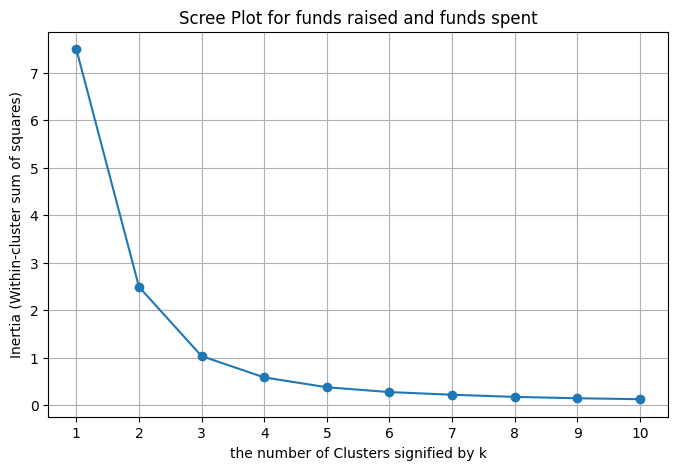

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Max-min normalizing raised and spent
scaler = MinMaxScaler()
df[['Raised_normalized', 'Spent_normalized']] = scaler.fit_transform(df[['Raised', 'Spent']])

# Scree plot for normalized data
X_raised_spent = df[['Raised_normalized', 'Spent_normalized']]
inertia_raised_spent = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_raised_spent)
    inertia_raised_spent.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_raised_spent, marker='o')
plt.xlabel('the number of Clusters signified by k')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Scree Plot for funds raised and funds spent')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

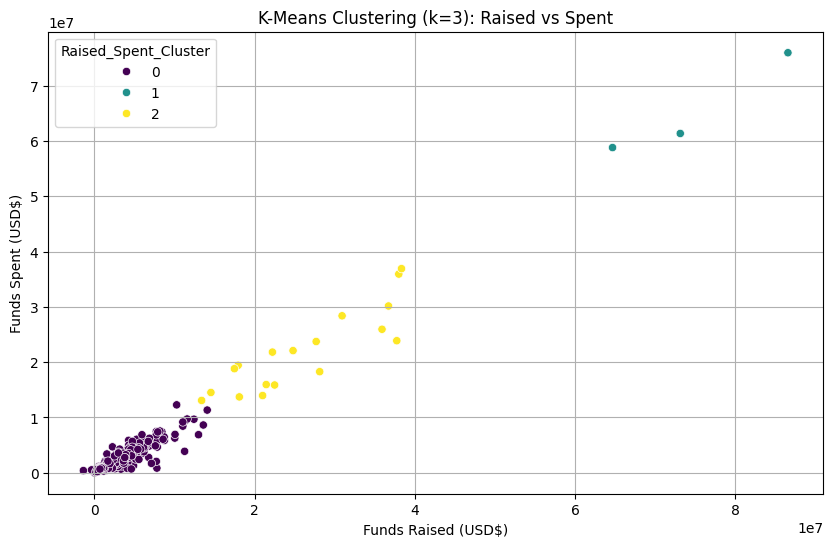

The two smallest clusters for Raised and Spent are: [1, 2]


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Raised_Spent_Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,2
87,Catherine Cortez Masto,Democratic,Nevada,Senate,37993811.0,35928936.0,5089745.0,0.0,2
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,2
115,Dan Crenshaw,Republican,Texas,House,14535870.0,14512435.0,1876149.0,0.0,2
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,2
290,Katie Porter,Democratic,California,House,21441693.0,15946876.0,15762568.0,0.0,2
298,Kevin McCarthy,Republican,California,House,24791538.0,22086344.0,7507326.0,0.0,2
326,Maggie Hassan,Democratic,New Hampshire,Senate,30914830.0,28380992.0,4813508.0,0.0,2
328,Marco Rubio,Republican,Florida,Senate,36709285.0,30153111.0,9631856.0,0.0,2
340,Mark Kelly,Democratic,Arizona,Senate,73140886.0,61357281.0,13186127.0,0.0,1


In [47]:
# K-Means clustering
kmeans_raised_spent = KMeans(n_clusters=3, random_state=100, n_init=10)
df['Raised_Spent_Cluster'] = kmeans_raised_spent.fit_predict(X_raised_spent)

# scatter plot of raised against Spent
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Raised_Spent_Cluster', palette='viridis', legend='full')
plt.xlabel('Funds Raised (USD$)')
plt.ylabel('Funds Spent (USD$)')
plt.title('K-Means Clustering (k=3): Raised vs Spent')
plt.grid(True)
plt.show()

# smallest clusters
cluster_counts = df['Raised_Spent_Cluster'].value_counts().sort_values()
smallest_clusters = cluster_counts.head(2).index.tolist()

print(f"The two smallest clusters for Raised and Spent are: {smallest_clusters}")

# Get the members of the smallest two clusters
members_smallest_clusters = df[df['Raised_Spent_Cluster'].isin(smallest_clusters)][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Raised_Spent_Cluster']]

display(members_smallest_clusters)

Cruz, Scott, Demings, Kelly, Pelosi were members of the two smallest clusters.

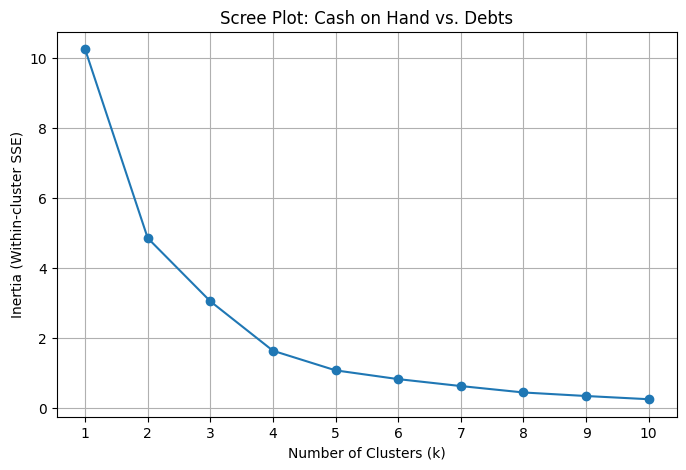

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Max-min normalize 'Cash on Hand' and 'Debts'
scaler = MinMaxScaler()
df[['Cash_normalized', 'Debts_normalized']] = scaler.fit_transform(df[['Cash on Hand', 'Debts']])

# Create a scree plot for the normalized data
X_cash_debts = df[['Cash_normalized', 'Debts_normalized']]
inertia_cash_debts = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_cash_debts)
    inertia_cash_debts.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_cash_debts, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.title('Scree Plot: Cash on Hand vs. Debts')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

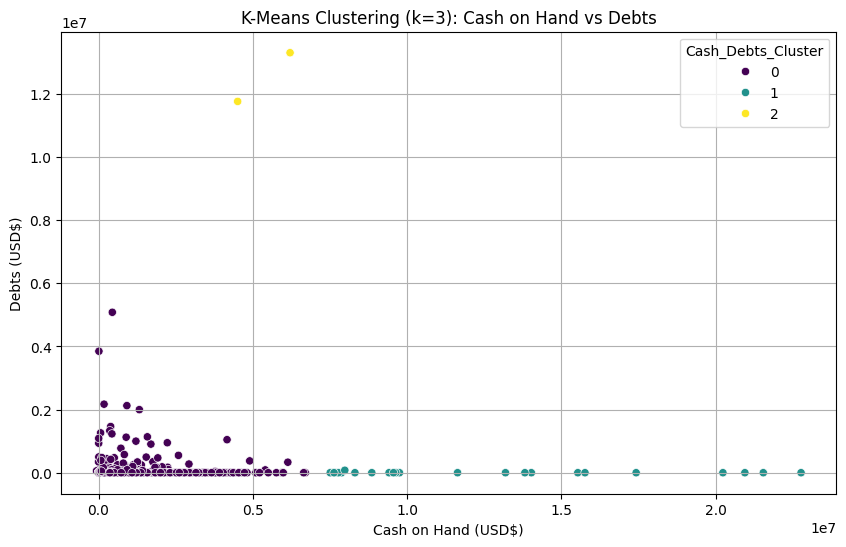

The two smallest clusters for Cash on Hand and Debts are: [2, 1]


,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts,Cash_Debts_Cluster
2,Adam Schiff,Democratic,California,House,20993041.0,13957854.0,20942888.0,0.0,1
11,Alex Padilla,Democratic,California,Senate,11253771.0,3870947.0,7617654.0,5703.0,1
45,Bernie Sanders,Independent,Vermont,Senate,14074831.0,11331428.0,9751125.0,0.0,1
89,Chuck Schumer,Democratic,New York,Senate,35899966.0,25944350.0,20231213.0,0.0,1
112,Cory Booker,Democratic,New Jersey,Senate,5794554.0,4010634.0,7671026.0,0.0,1
133,David Trone,Democratic,Maryland,House,12990741.0,6878050.0,6206371.0,13302000.0,2
239,Jim Jordan,Republican,Ohio,House,12417107.0,9675701.0,8855217.0,0.0,1
247,Joe Manchin,Democratic,West Virginia,Senate,7790164.0,835794.0,9414431.0,0.0,1
261,John Kennedy,Republican,Louisiana,Senate,28119082.0,18276565.0,15530074.0,0.0,1
267,John Thune,Republican,South Dakota,Senate,6770674.0,2763217.0,17419927.0,0.0,1


In [49]:
# K-means clustering w/ k=3
kmeans_cash_debts = KMeans(n_clusters=3, random_state=100, n_init=10)
df['Cash_Debts_Cluster'] = kmeans_cash_debts.fit_predict(X_cash_debts)

# Create a scatter plot of Cash on Hand against Debts, hue by cluster membership
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cash_Debts_Cluster', palette='viridis', legend='full')
plt.xlabel('Cash on Hand (USD$)')
plt.ylabel('Debts (USD$)')
plt.title('K-Means Clustering (k=3): Cash on Hand vs Debts')
plt.grid(True)
plt.show()

# Identify the two smallest clusters
cluster_counts_cash_debts = df['Cash_Debts_Cluster'].value_counts().sort_values()
smallest_clusters_cash_debts = cluster_counts_cash_debts.head(2).index.tolist()

print(f"The two smallest clusters for Cash on Hand and Debts are: {smallest_clusters_cash_debts}")

# Get the members of the smallest two clusters
members_smallest_clusters_cash_debts = df[df['Cash_Debts_Cluster'].isin(smallest_clusters_cash_debts)][['Member', 'Party', 'State', 'Chamber', 'Raised', 'Spent', 'Cash on Hand', 'Debts', 'Cash_Debts_Cluster']]

display(members_smallest_clusters_cash_debts)

The two smallest clusters include members such as Tim Scott, Tom Cotton, Mitch McConnell, Marco Rubio, and John Kennedy. Compared to the first model, the clustering pattern is different. In the first model, clusters showed an upward trend and spread out as the amount raised increased, while in the second model no such trend is visible.




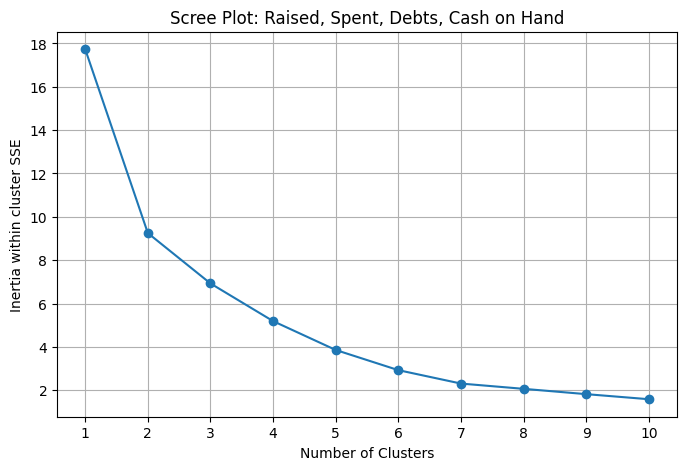

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the four numeric variables
X_all = df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]

# Max-min normalize the selected variables
scaler_all = MinMaxScaler()
X_all_normalized = scaler_all.fit_transform(X_all)

# Create a scree plot for the normalized data
inertia_all = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100, n_init=10)
    kmeans.fit(X_all_normalized)
    inertia_all.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_all, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia within cluster SSE")
plt.title("Scree Plot: Raised, Spent, Debts, Cash on Hand")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [51]:
# Run K-means clustering on all four variables
kmeans_all = KMeans(n_clusters=2, random_state=100, n_init=10)
df['All_Variables_Cluster'] = kmeans_all.fit_predict(X_all_normalized)

# Display cluster membership counts
display(df['All_Variables_Cluster'].value_counts())

# Description of each glustary with grouped stats
display(df.groupby('All_Variables_Cluster')[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe())

,count
All_Variables_Cluster,
0,514
1,23


Raised                                         \
                       count          mean           std        min   
All_Variables_Cluster                                                 
0                      514.0  2.433483e+06  2.532719e+06 -1386356.0   
1                       23.0  2.948903e+07  2.106584e+07  6695582.0   

                                                                        Spent  \
                              25%         50%          75%         max  count   
All_Variables_Cluster                                                           
0                        920754.0   1654624.5   3098516.25  18086343.0  514.0   
1                      13532786.0  24791538.0  37226270.50  86581469.0   23.0   

                                     ... Cash on Hand              Debts  \
                               mean  ...          75%         max  count   
All_Variables_Cluster                ...                                   
0                      1.930532e+06  ...    1794454.0   9558166.0  514.0   
1                      2.398697e+07  ...   15646321.0  22762985.0   23.0   

                                                                          \
                               mean           std  min  25%  50%     75%   
All_Variables_Cluster                                                      
0                      8.364666e+04  3.704155e+05  0.0  0.0  0.0  112.75   
1                      1.092606e+06  3.616785e+06  0.0  0.0  0.0    0.00   

                                   
                              max  
All_Variables_Cluster              
0                       5081387.0  
1                      13302000.0  

[2 rows x 32 columns]

The k-means clustering algorithm was effective in uncovering patterns within campaign finance data, allowing us to identify both outliers and high-activity campaigns. These insights could be used to suggest alternative financial strategies for politicians.